参考链接：https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/

## 加载数据

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data/Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')
data.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [4]:
data.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


## 特征工程1 日期相关的特征

In [9]:
data['year']=data['Datetime'].dt.year 
data['month']=data['Datetime'].dt.month 
data['day']=data['Datetime'].dt.day

data['dayofweek_num']=data['Datetime'].dt.dayofweek  
data['dayofweek_name']=data['Datetime'].dt.day_name()

data.head()

,ID,Datetime,Count,year,month,day,dayofweek_num,dayofweek_name
0,0,2012-08-25 00:00:00,8,2012,8,25,5,Saturday
1,1,2012-08-25 01:00:00,2,2012,8,25,5,Saturday
2,2,2012-08-25 02:00:00,6,2012,8,25,5,Saturday
3,3,2012-08-25 03:00:00,2,2012,8,25,5,Saturday
4,4,2012-08-25 04:00:00,2,2012,8,25,5,Saturday


## 特征工程2 时间相关的特征

In [10]:
data['Hour'] = data['Datetime'].dt.hour 
data['minute'] = data['Datetime'].dt.minute 
data.head()

,ID,Datetime,Count,year,month,day,dayofweek_num,dayofweek_name,Hour,minute
0,0,2012-08-25 00:00:00,8,2012,8,25,5,Saturday,0,0
1,1,2012-08-25 01:00:00,2,2012,8,25,5,Saturday,1,0
2,2,2012-08-25 02:00:00,6,2012,8,25,5,Saturday,2,0
3,3,2012-08-25 03:00:00,2,2012,8,25,5,Saturday,3,0
4,4,2012-08-25 04:00:00,2,2012,8,25,5,Saturday,4,0



datetime属性
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/time-features.png)

## 特征工程3 Lag特征

In [13]:
import pandas as pd
data = pd.read_csv('data/Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')

data['lag_1'] = data['Count'].shift(1)
data = data[['Datetime', 'lag_1', 'Count']]
data.head()

,Datetime,lag_1,Count
0,2012-08-25 00:00:00,NaN,8
1,2012-08-25 01:00:00,8.0,2
2,2012-08-25 02:00:00,2.0,6
3,2012-08-25 03:00:00,6.0,2
4,2012-08-25 04:00:00,2.0,2


lag_1相当于Count的前一天数据，
- 第1行 lag_1为Nan是因为没有前一天的数据


In [15]:
import pandas as pd
data = pd.read_csv('data/Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')

data['lag_1'] = data['Count'].shift(1)
data['lag_2'] = data['Count'].shift(2)
data['lag_3'] = data['Count'].shift(3)
data['lag_4'] = data['Count'].shift(4)
data['lag_5'] = data['Count'].shift(5)
data['lag_6'] = data['Count'].shift(6)
data['lag_7'] = data['Count'].shift(7)

data = data[['Datetime', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'Count']]
data.head(10)

,Datetime,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,Count
0,2012-08-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,2012-08-25 01:00:00,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2012-08-25 02:00:00,2.0,8.0,NaN,NaN,NaN,NaN,NaN,6
3,2012-08-25 03:00:00,6.0,2.0,8.0,NaN,NaN,NaN,NaN,2
4,2012-08-25 04:00:00,2.0,6.0,2.0,8.0,NaN,NaN,NaN,2
5,2012-08-25 05:00:00,2.0,2.0,6.0,2.0,8.0,NaN,NaN,2
6,2012-08-25 06:00:00,2.0,2.0,2.0,6.0,2.0,8.0,NaN,2
7,2012-08-25 07:00:00,2.0,2.0,2.0,2.0,6.0,2.0,8.0,2
8,2012-08-25 08:00:00,2.0,2.0,2.0,2.0,2.0,6.0,2.0,6
9,2012-08-25 09:00:00,6.0,2.0,2.0,2.0,2.0,2.0,6.0,2


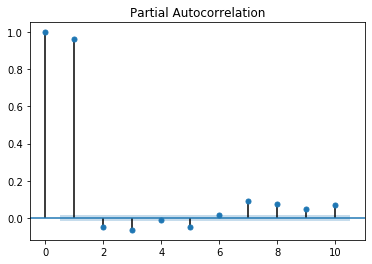

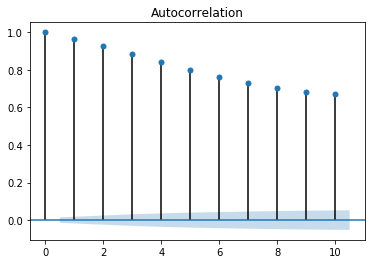

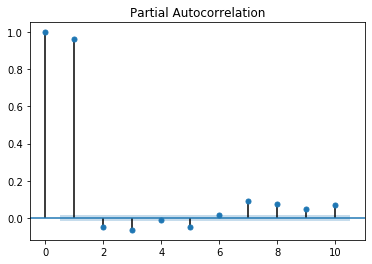

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data['Count'], lags=10)
plot_pacf(data['Count'], lags=10)

偏自相关函数显示出与第一滞后的高度相关性，与第二滞后和第三滞后的相关性较小。 自相关函数显示出缓慢的衰减，这意味着将来的值与其过去的值具有非常高的相关性

## 特征工程4 Rolling Window特征

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/3hotmk.gif)

由于这看起来像一个随每个下一个点滑动的窗口，因此使用此方法生成的特征称为“滚动窗口”特征。

In [23]:
import pandas as pd
data = pd.read_csv('data/Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')

data['rolling_mean'] = data['Count'].rolling(window=2).mean()
data = data[['Datetime', 'rolling_mean', 'Count']]
data.head(10)

,Datetime,rolling_mean,Count
0,2012-08-25 00:00:00,NaN,8
1,2012-08-25 01:00:00,5.0,2
2,2012-08-25 02:00:00,4.0,6
3,2012-08-25 03:00:00,4.0,2
4,2012-08-25 04:00:00,2.0,2
5,2012-08-25 05:00:00,2.0,2
6,2012-08-25 06:00:00,2.0,2
7,2012-08-25 07:00:00,2.0,2
8,2012-08-25 08:00:00,4.0,6
9,2012-08-25 09:00:00,4.0,2


类似地，您可以将总和、最小值、最大值等(针对所选窗口)视为一个特性，并在您自己的机器上试用它。

## 特征工程5 Expanding Window特征

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/12/output_B4KHcT-225x300.gif)

In [24]:
import pandas as pd
data = pd.read_csv('data/Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')

data['expanding_mean'] = data['Count'].expanding(2).mean()
data = data[['Datetime','Count', 'expanding_mean']]
data.head(10)

,Datetime,Count,expanding_mean
0,2012-08-25 00:00:00,8,NaN
1,2012-08-25 01:00:00,2,5.000000
2,2012-08-25 02:00:00,6,5.333333
3,2012-08-25 03:00:00,2,4.500000
4,2012-08-25 04:00:00,2,4.000000
5,2012-08-25 05:00:00,2,3.666667
6,2012-08-25 06:00:00,2,3.428571
7,2012-08-25 07:00:00,2,3.250000
8,2012-08-25 08:00:00,6,3.555556
9,2012-08-25 09:00:00,2,3.400000


基于时序数据的特征工程 --- Python实现 :https://www.jianshu.com/p/4ece90357020

Minimum Daily Temperatures数据集
本文将使用Minimum Daily Temperatures数据集。该数据集描述了澳大利亚墨尔本10年（1981-1990）的每天的最低温度。单位为摄氏度，有3,650个观测值。数据来源为澳大利亚气象局。
下面是前5行数据的示例，包括标题行。

```
"Date","Temperature"
"1981-01-01",20.7
"1981-01-02",17.9
"1981-01-03",18.8
"1981-01-04",14.6
"1981-01-05",15.8
```

In [39]:
# create date time features of a dataset
from pandas import read_csv
from pandas import DataFrame
series = read_csv('data/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame()
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['temperature'] = [series[i] for i in range(len(series))]
print(dataframe.head(5))

   month  day  temperature
0      1    1         20.7
1      1    2         17.9
2      1    3         18.8
3      1    4         14.6
4      1    5         15.8


## Lag特征

Lag特征是将时间序列预测问题转化为监督学习问题的经典方式。
最简单的方法是在给定前一时间（t-1）的值的情况下预测下一次（t + 1）的值。具有移位值的监督学习问题如下所示：
```
Value(t-1), Value(t+1)
Value(t-1), Value(t+1)
Value(t-1), Value(t+1)
```
Pandas库提供shift()函数，以帮助从时间序列数据集创建这些移位或滞后特征。将数据集移动1会创建t-1列，为第一行添加NaN（未知）值。没有移位的时间序列数据集表示t + 1。
让我们以一个例子来具体化。温度数据集的前3个值分别为20.7,17.9和18.8。因此，前3个观测值的移位和未移位温度列表如下：



In [40]:
temps = dataframe
dataframe = concat([temps['temperature'].shift(1), temps['temperature']], axis=1)
dataframe.columns = ['t-1', 't+1']
dataframe.head(5)

,t-1,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


我们可以扩展窗口宽度并包含更多Lag特征。例如，下面的上述情况被修改为包括最后的3个观察值以预测下一个时间步的值。

In [41]:
series = read_csv('data/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
dataframe = DataFrame()
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['temperature'] = [series[i] for i in range(len(series))]
dataframe = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-3', 't-2', 't-1', 't+1']
print(dataframe.head(5))

    t-3   t-2   t-1   t+1
0   NaN   NaN   NaN  20.7
1   NaN   NaN  20.7  17.9
2   NaN  20.7  17.9  18.8
3  20.7  17.9  18.8  14.6
4  17.9  18.8  14.6  15.8


https://blog.csdn.net/zhaodedong/article/details/103004322  特征工程系列：时间特征构造以及时间序列特征构造

In [42]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
series = read_csv('data/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-2,t-1)', 't+1']
print(dataframe.head(5))

   mean(t-2,t-1)   t+1
0            NaN  20.7
1            NaN  17.9
2          19.30  18.8
3          18.35  14.6
4          16.70  15.8


In [47]:
series = read_csv('data/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
temps.columns=['temp']

In [53]:
temps['rolling_mean'] = temps['temp'].rolling(window=2).mean()
temps = temps[[ 'rolling_mean', 'temp']]

In [54]:
temps

,rolling_mean,temp
0,NaN,20.7
1,19.30,17.9
2,18.35,18.8
3,16.70,14.6
4,15.20,15.8
...,...,...
3645,14.30,14.0
3646,13.80,13.6
3647,13.55,13.5
3648,14.60,15.7
